https://drive.google.com/file/d/1bnEZvP55SNAzFomR9brwXdCKERuQ1UHl/view?usp=sharing

https://drive.google.com/file/d/1iH69AmFQ__rBaSBEmcIFeijmUGgmqRO9/view?usp=sharing

https://drive.google.com/file/d/1rY0ysJ7QCZ8TrcjjpaePsbZHGEEF148R/view?usp=sharing

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from datetime import datetime
import pandas_datareader as pdr
import pandas.util.testing as tm
from matplotlib import pyplot as plt

In [13]:
SA_oil = pd.read_csv("2222.csv", usecols=['Date', 'Adj Close'],
                                   parse_dates=["Date"],
                                   index_col=["Date"])
#SA_oil = SA_oil.rename()
#SA_oil.head()

In [14]:
# retuen = (current - pervious) / current
returns_SA_oil = SA_oil.pct_change()
returns_SA_oil.head()
#returns_SA_oil.shape

,Adj Close
Date,
2020-01-01,NaN
2020-02-01,-0.023426
2020-03-01,-0.095952
2020-04-01,0.052429
2020-05-01,0.042654


In [15]:
Rajhi = pd.read_csv("1120.csv", usecols=['Date', 'Adj Close'],
                                   parse_dates=["Date"],
                                   index_col=["Date"])

#df.head()
returns_Rajhi = Rajhi.pct_change()
returns_Rajhi.head()

,Adj Close
Date,
2020-01-01,NaN
2020-02-01,-0.054217
2020-03-01,-0.143312
2020-04-01,0.093006
2020-05-01,0.008741


In [16]:
Sabic = pd.read_csv("2020.csv", usecols=['Date', 'Adj Close'],
                                   parse_dates=["Date"],
                                   index_col=["Date"])
#df.head()
returns_Sabic = Sabic.pct_change()
returns_Sabic.head()

,Adj Close
Date,
2020-01-01,NaN
2020-02-01,-0.104000
2020-03-01,-0.077381
2020-04-01,0.170016
2020-05-01,0.076271


In [17]:
#SA_oil, Rajhi, Sabic,
df = pd.merge(returns_SA_oil, returns_Rajhi, on='Date', how='inner')
#df


In [18]:
matrix_of_return_values = pd.merge(df, returns_Sabic, on='Date', how='inner')
matrix_of_return_values = matrix_of_return_values.dropna()
#matrix_of_return_value.index.duplicated().any()
matrix_of_return_values.head()


,Adj Close_x,Adj Close_y,Adj Close
Date,,,
2020-02-01,-0.023426,-0.054217,-0.104000
2020-03-01,-0.095952,-0.143312,-0.077381
2020-04-01,0.052429,0.093006,0.170016
2020-05-01,0.042654,0.008741,0.076271
2020-06-01,0.108000,-0.019064,-0.022310


In [19]:
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [20]:
no_of_portfolios = 500
no_of_asset_classes = matrix_of_return_values.shape[1]

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights) 
    return random_asset_weights
asset_weights = get_random_asset_weights(no_of_asset_classes)   
asset_weights 

matrix([[0.15183766, 0.47187253, 0.37628981]])

In [21]:
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 0))
    #asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    asset_covariances = np.asmatrix(matrix_of_return_values.cov())
    portfolio_mean = asset_weights * asset_means.T
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio  
    #print(portfolio_sharpe_ratio)
get_portfolio_statistics(asset_weights, matrix_of_return_values)    

(0.037636556307309346, 0.06394260594608073, 0.5885990373780853)

In [23]:
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    A,B,C=get_portfolio_statistics(random_asset_weights,matrix_of_return_values)
    portfolio_means.append(A)
    portfolio_standard_deviations.append(B)
    portfolio_sharpe_ratios.append(C)   

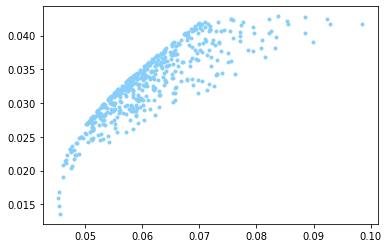

In [24]:
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [25]:
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(index)

267


In [26]:
print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.07118374 0.07893325 0.84988301]]
0.5984889357272646


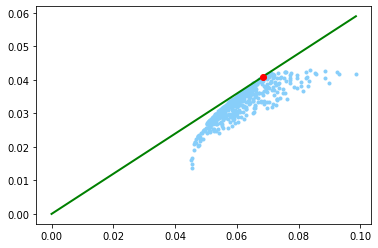

In [27]:
x = np.linspace(0, max(portfolio_standard_deviations), 500)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index], portfolio_means[index], color= 'r', marker = 'o' )
plt.show()